In [1]:
import pandas as pd
import math
import matplotlib.pyplot as ply
%matplotlib inline

## Preparing the dataframe

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis = 1)
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
886,887,0,27.0
887,888,1,19.0
888,889,0,NaN
889,890,1,26.0


In [4]:
df = df.head(400)  # taking the first 400 entries for regression
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
395,396,0,22.0
396,397,0,31.0
397,398,0,46.0
398,399,0,23.0


In [5]:
length = len(df.index)
length

400

In [6]:
df = df.dropna()  # removing NaN values
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
395,396,0,22.0
396,397,0,31.0
397,398,0,46.0
398,399,0,23.0


## Extracting needed data and initial calculation

In [7]:
# We will preform logistic regression with Probability of survival vs Age

X = []   # list to store the Age
for i in range(length):
    try:
        X.append(df.Age[i])
    except:
        pass
X

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 31.0,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 19.0,
 40.0,
 66.0,
 28.0,
 42.0,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 3.0,
 19.0,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 0.83,
 30.0,
 22.0,
 29.0,
 28.0,
 17.0,
 33.0,
 16.0,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 38.0,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 32.5,
 32.5,
 54.0,
 12.0,
 24.0,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51.0,
 22.0,
 55.5,
 40.5,
 51.0,
 16.0,
 30.0,
 44.0,
 40.0,
 26.0,
 17.0,
 1.0,
 9.0,
 45.0,
 28.0,
 61.0,
 4.0,
 1.0,
 21.0,
 56.0,
 18.0,
 50.0,
 30.0,
 36.0,

In [8]:
# calculation of probability of survival to find the odds 
tot = len(df.index)
survived = 0
for i in range(length):
    try:
        if df.Survived[i] == 1:
            survived += 1
    except:
        pass
prob_survive = survived / tot
prob_survive

0.38819875776397517

In [9]:
# The sigmoid function can be linearised plotting graph of natural log odds vs Age
# Then we calculate slope and intercept for this graph. Here the model is   Y = mX + c

Y = []      # holds log odds 

# Next we calculate the odds and then ln(odds) which is appended to Y
# This linearises the problem so we can find slope and intercept and then transform to a sigmoid function

for i in range(length):
    try:
        if df.Survived[i] == 1:
            odds = prob_survive / (1-prob_survive)
        else:
            odds = (1-prob_survive) / prob_survive
        Y.append(math.log(odds))
    except:
        pass
Y

[0.45488999143568726,
 -0.45488999143568737,
 -0.45488999143568737,
 -0.45488999143568737,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 -0.45488999143568737,
 -0.45488999143568737,
 -0.45488999143568737,
 -0.45488999143568737,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 -0.45488999143568737,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 -0.45488999143568737,
 -0.45488999143568737,
 -0.45488999143568737,
 0.45488999143568726,
 -0.45488999143568737,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 -0.45488999143568737,
 0.45488999143568726,
 0.45488999143568726,
 -0.45488999143568737,
 -0.45488999143568737,
 0.45488999143568726,
 0.45488999143568726,
 0.45488999143568726,
 -0.45488999143568737,
 -0.45488999143568737,
 0.45488999143568726,
 -0.45488999143568737,
 0.45488999143568726,
 -0.45488999143568737,
 0.4548899914

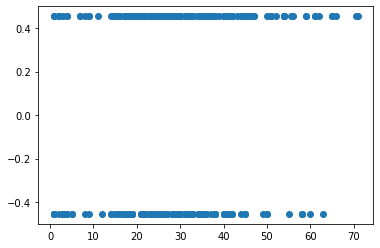

In [10]:
# plotting natural log odds vs age (points)
ply.scatter(X,Y)
#linear regression technique will be used here

## Finding Slope and Intercept

In [11]:
m = 0
c = 0
lr = 0.001
iterations = 10000

In [12]:
# performing m and c calculations like in linear regression

# function for gradient descend
def descend(curr, y_pred, Y, x = [1.0 for k in range(len(Y))]):
    for j in range(len(Y)):
        curr -= (lr/len(Y)) * (y_pred[j] - Y[j]) * x[j]
    return curr

# iterating to perform gradient descend
for i in range(100):     # 100 iterations to calculate m and c
    y_pred = [m * x_val for x_val in X]
    m = descend(m, y_pred, Y, X)
    c = descend(c, y_pred, Y)

In [13]:
m    # final m value

0.003515169901049378

In [14]:
c    # final c value

0.0001874950648565977

In [15]:
y_final = [m * x_val + c for x_val in X]   # final prediction of natural log odds
y_final

[0.07752123288794292,
 0.13376395130473298,
 0.09158191249214044,
 0.12321844160158484,
 0.12321844160158484,
 0.19000666972152302,
 0.007217834866955354,
 0.09509708239318981,
 0.04939987367954789,
 0.01424817466905411,
 0.20406734932572054,
 0.07049089308584416,
 0.13727912120578234,
 0.04939987367954789,
 0.1935218396225724,
 0.007217834866955354,
 0.10915776199738733,
 0.12321844160158484,
 0.11970327170053546,
 0.05291504358059727,
 0.09861225229423919,
 0.028308854273251624,
 0.13376395130473298,
 0.06697572318479479,
 0.14079429110683173,
 0.23218870853411555,
 0.09861225229423919,
 0.1478246309089305,
 0.07400606298689355,
 0.0634605532837454,
 0.04939987367954789,
 0.14079429110683173,
 0.09509708239318981,
 0.010733004768004732,
 0.06697572318479479,
 0.0634605532837454,
 0.024793684372202245,
 0.07400606298689355,
 0.17243082021627612,
 0.10212742219528857,
 0.2286735386330662,
 0.07400606298689355,
 0.10036983724476388,
 0.01776334457010349,
 0.038854363976399756,
 0.077521

## Transformation to Sigmoid function representing probability

In [16]:
# transform the log odds values of the prediction to sigmoid for probability
probability_calc = [1/(1+math.exp(-1.0*z)) for z in y_final]
probability_calc

[0.5193706084870832,
 0.533391214155902,
 0.5228794890314106,
 0.5307656945047672,
 0.5307656945047672,
 0.5473592706144701,
 0.5018044508828514,
 0.5237563699907731,
 0.5123474575147333,
 0.5035619834074703,
 0.5508405282739371,
 0.5176154296695301,
 0.534265983733469,
 0.5123474575147333,
 0.5482300330557864,
 0.5018044508828514,
 0.5272623756591616,
 0.5307656945047672,
 0.529890135448886,
 0.5132256750462839,
 0.524633104509932,
 0.5070767409714457,
 0.533391214155902,
 0.5167376745154563,
 0.5351405426033214,
 0.5577877907717766,
 0.524633104509932,
 0.5368890069247529,
 0.5184930761270923,
 0.5158598160686112,
 0.5123474575147333,
 0.5351405426033214,
 0.5237563699907731,
 0.5026832254336698,
 0.5167376745154563,
 0.5158598160686112,
 0.5061981035846129,
 0.5184930761270923,
 0.5430012137500956,
 0.5255096872103023,
 0.5569205616853443,
 0.5184930761270923,
 0.5250714151734828,
 0.5044407193757523,
 0.5097123691589452,
 0.5193706084870832,
 0.533391214155902,
 0.5395099901462801,

Text(0, 0.5, 'Probability of Survival')

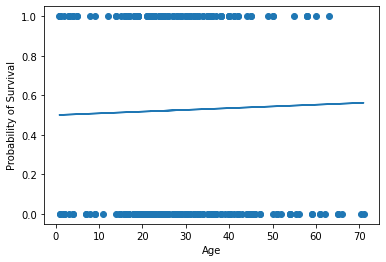

In [17]:
outcome_actual = []   # storing the actual outcome for plotting the sigmoid graph
for i in range(length):
    try:
        outcome_actual.append(df.Survived[i])
    except:
        pass
ply.scatter(X,outcome_actual)   # plotting the data points
ply.plot(X,probability_calc)        # plotting of the probability function
ply.xlabel("Age")
ply.ylabel("Probability of Survival")